In [24]:
import os

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(os.listdir("../data/raw"))

['credit_card_balance.csv', 'application_train.csv', 'application_test.csv', 'bureau_balance.csv', 'installments_payments.csv', 'bureau.csv', 'POS_CASH_balance.csv', '.gitkeep', 'previous_application.csv']


In [5]:
appTrainDf = pd.read_csv("../data/raw/application_train.csv")

In [6]:
print('Training data shape: ', appTrainDf.shape)

Training data shape:  (307511, 122)


In [8]:
for line in appTrainDf.columns:
    print(line)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [12]:
profile = pandas_profiling.ProfileReport(appTrainDf)
profile.to_file(outputfile="../reports/appTrainDf.html")

In [13]:
appTrainDf['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

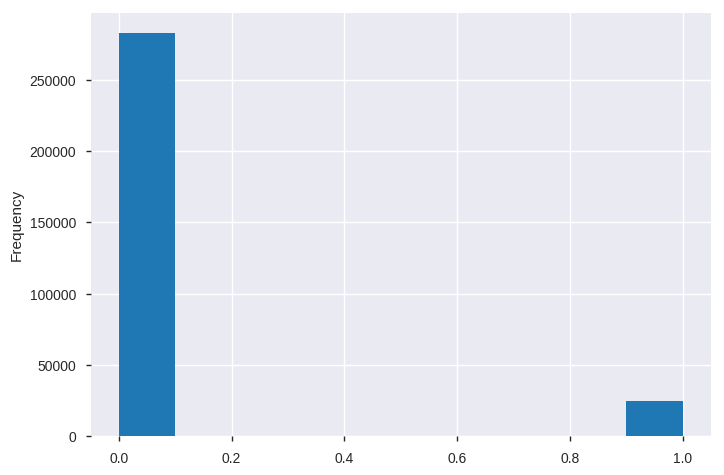

In [22]:
appTrainDf['TARGET'].astype(int).plot.hist()

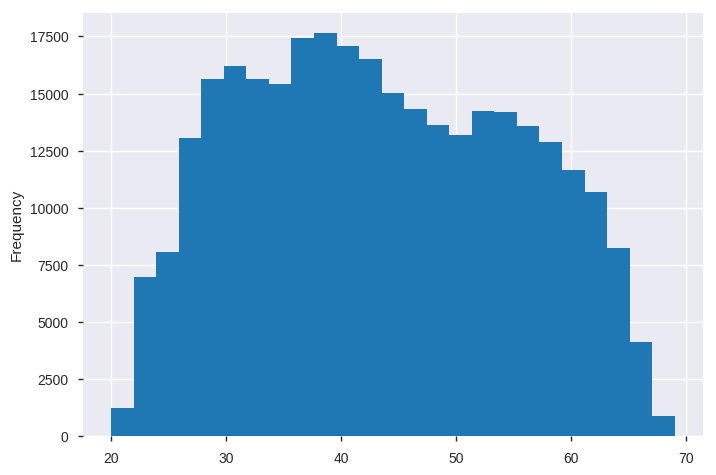

In [21]:
(appTrainDf['DAYS_BIRTH'] / -365).astype(int).plot.hist(bins = 25);

/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rob/anaconda3/envs/hcdr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


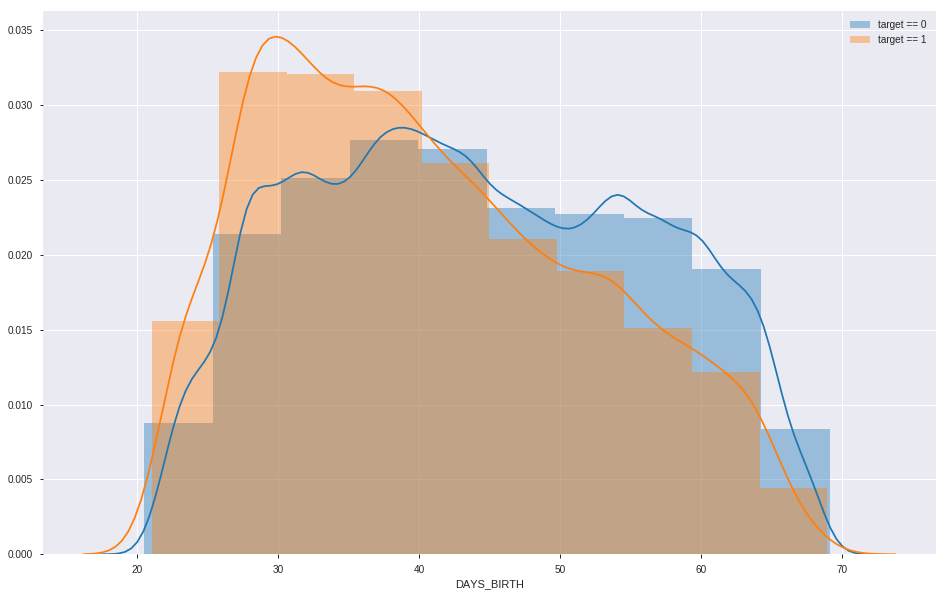

In [38]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', bins = 10)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', bins = 10)

plt.legend()

In [40]:
appTrainDf['YEARS_BIRTH'] = appTrainDf['DAYS_BIRTH'] / -365